In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
#Step 1: Loading the dataset and dealing with missing values
#Loading the dataset
data = pd.read_csv('/Users/muhammadhassanzahoor/Desktop/NEU/ALY 6020 - Predictive Analytics/Module 1/Model 1 Project/adult-all.csv')

In [51]:
#Renaming the columns
data.columns = [
    "Age", "Workclass", "Final_Weight", "Education", "Education_Num", 
    "Marital_Status", "Occupation", "Relationship", "Race", "Gender", 
    "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Native_Country", "Salary"
]
print(data.head())

   Age         Workclass  Final_Weight  Education  Education_Num  \
0   50  Self-emp-not-inc         83311  Bachelors             13   
1   38           Private        215646    HS-grad              9   
2   53           Private        234721       11th              7   
3   28           Private        338409  Bachelors             13   
4   37           Private        284582    Masters             14   

       Marital_Status         Occupation   Relationship   Race  Gender  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   Capital_Gain  Capital_Loss  Hours_per_Week Native_Country Salary  
0             0             0              13  United-States  <=50K  
1     

In [53]:
#Checking for missing values
missing_values = data.isna().sum()
print(missing_values)

Age               0
Workclass         0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_per_Week    0
Native_Country    0
Salary            0
dtype: int64


In [55]:
#replacing ? with NaN
data.replace('?', pd.NA, inplace = True)

#Drop rows with NaN
data.dropna(inplace = True)

#Dropping irrelevant columns
data.drop(["Final_Weight"], axis = 1, inplace = True)

In [57]:
#Step 2: EDA of the dataset
data.describe()


,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.547931,10.118396,1101.406625,88.597377,40.938038
std,13.218016,2.552873,7506.511388,404.960355,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45221 entries, 0 to 48840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45221 non-null  int64 
 1   Workclass       45221 non-null  object
 2   Education       45221 non-null  object
 3   Education_Num   45221 non-null  int64 
 4   Marital_Status  45221 non-null  object
 5   Occupation      45221 non-null  object
 6   Relationship    45221 non-null  object
 7   Race            45221 non-null  object
 8   Gender          45221 non-null  object
 9   Capital_Gain    45221 non-null  int64 
 10  Capital_Loss    45221 non-null  int64 
 11  Hours_per_Week  45221 non-null  int64 
 12  Native_Country  45221 non-null  object
 13  Salary          45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


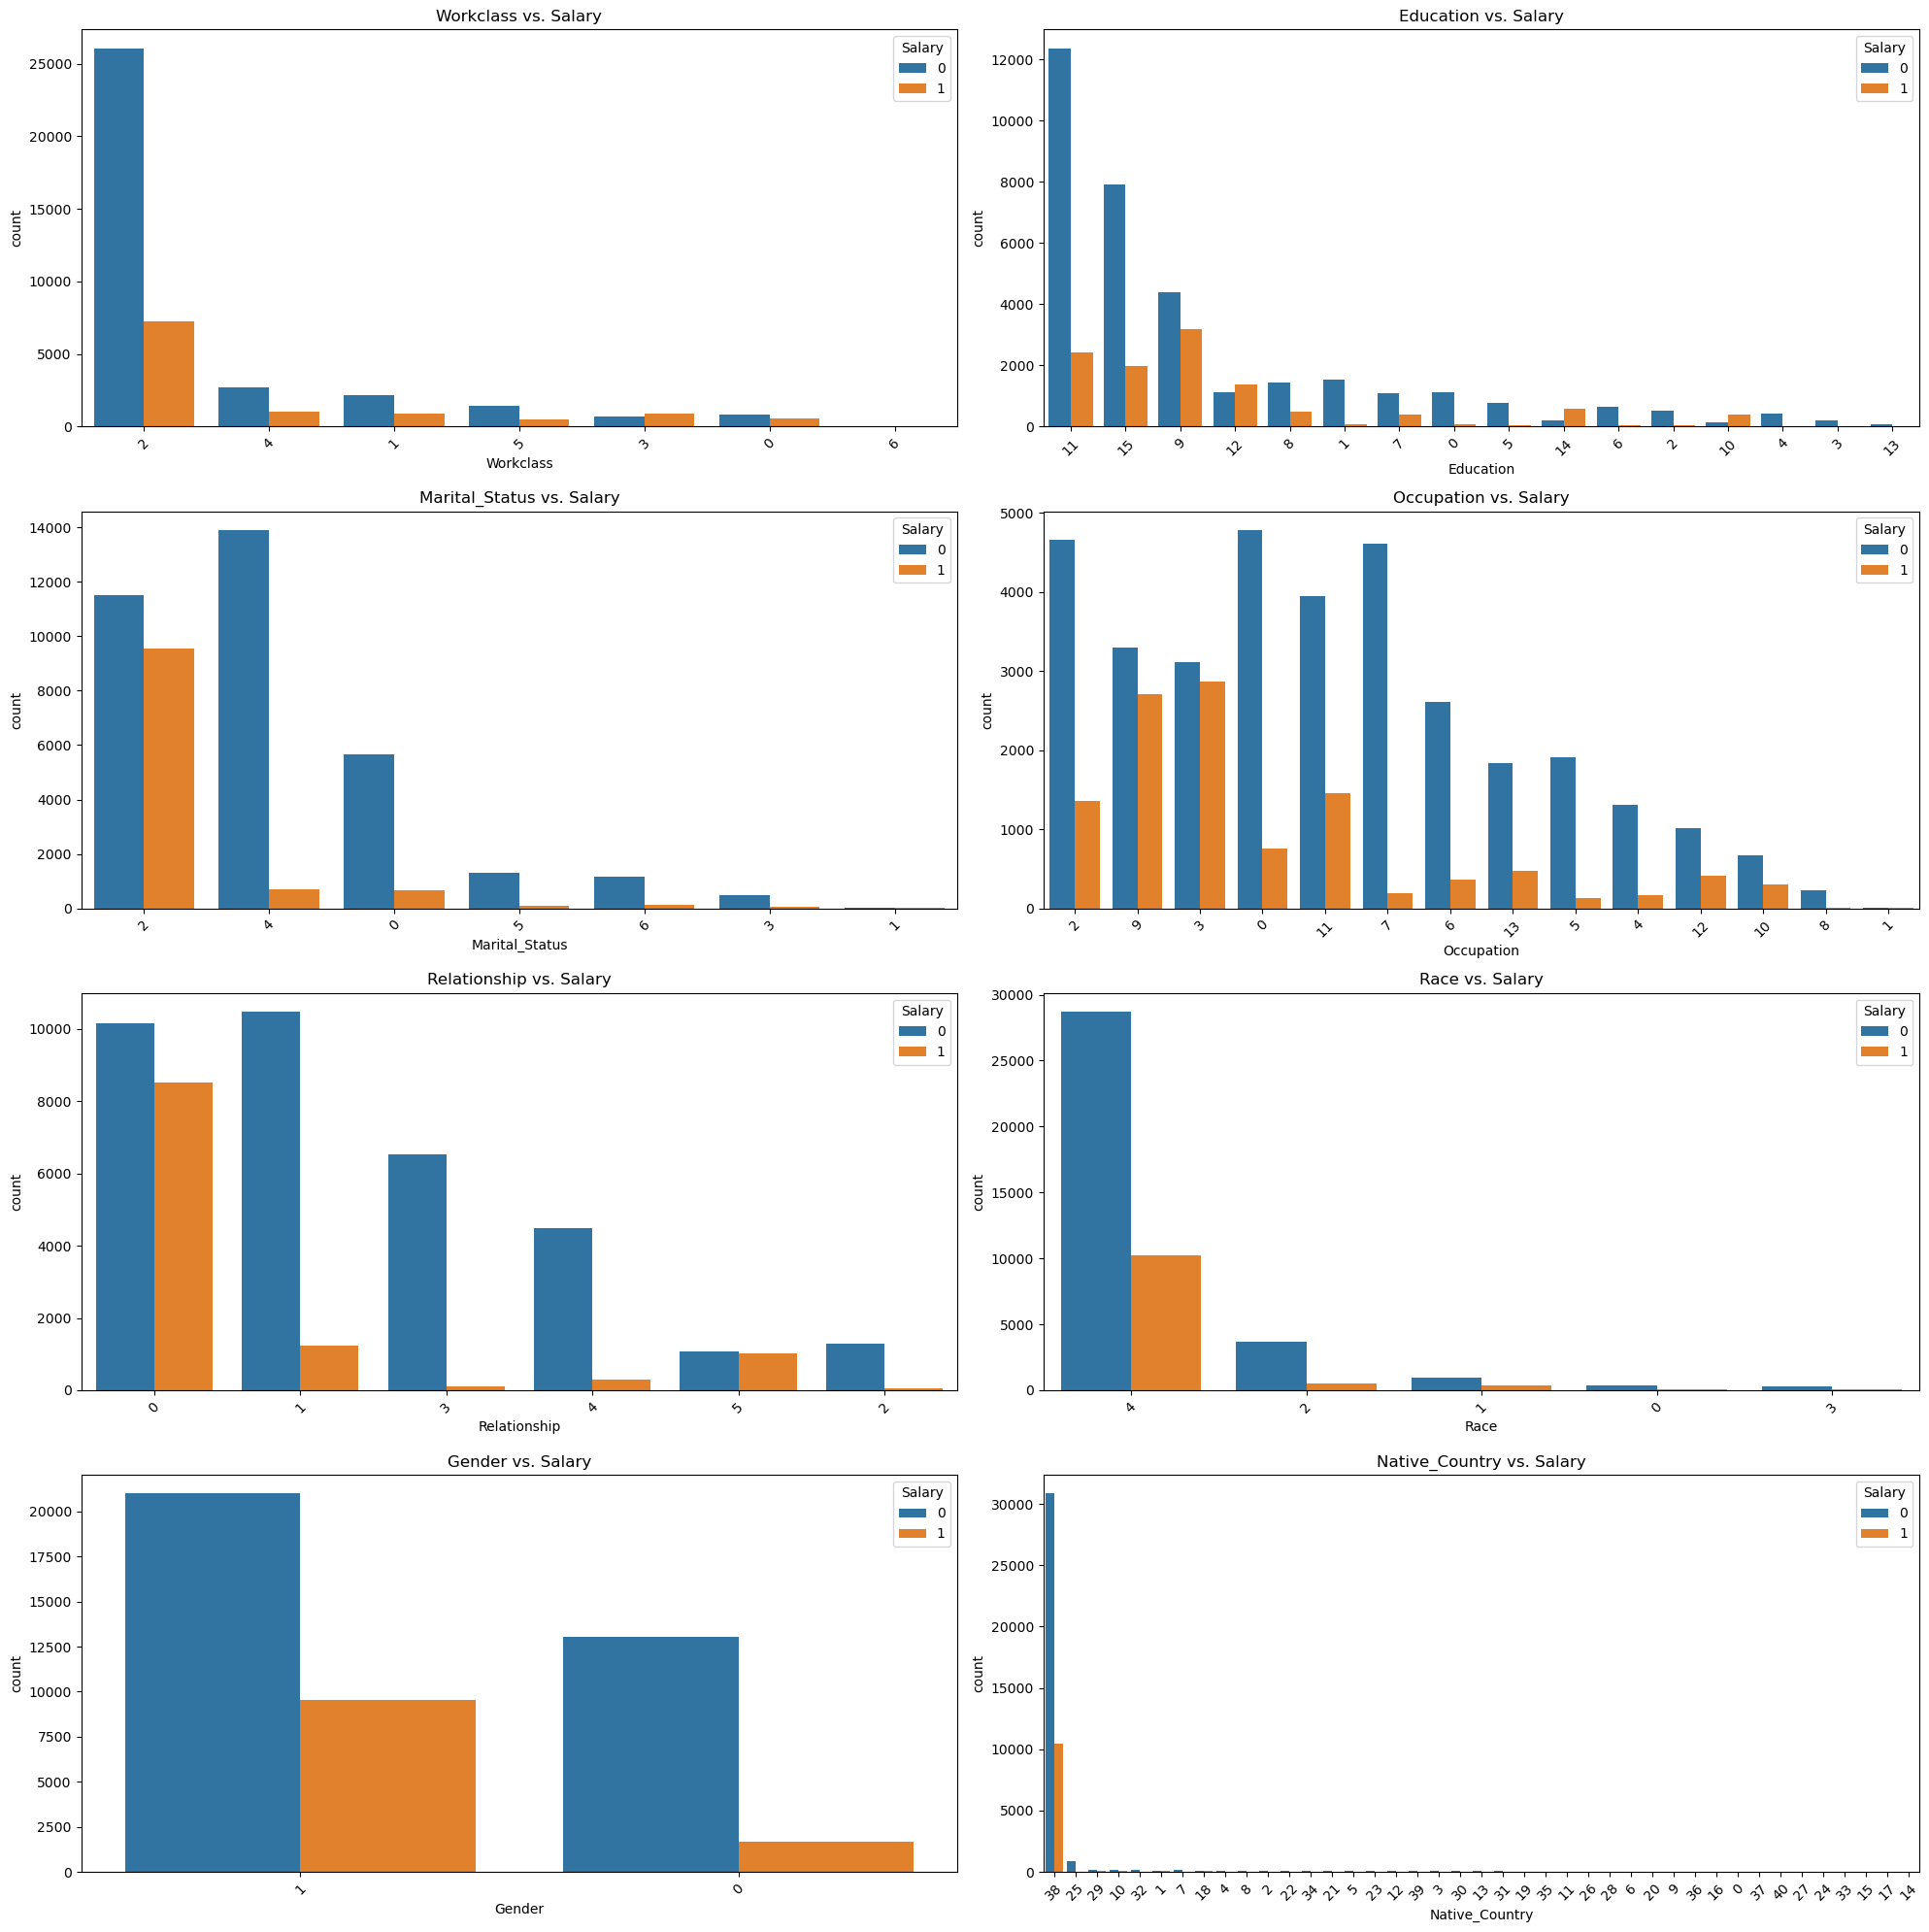

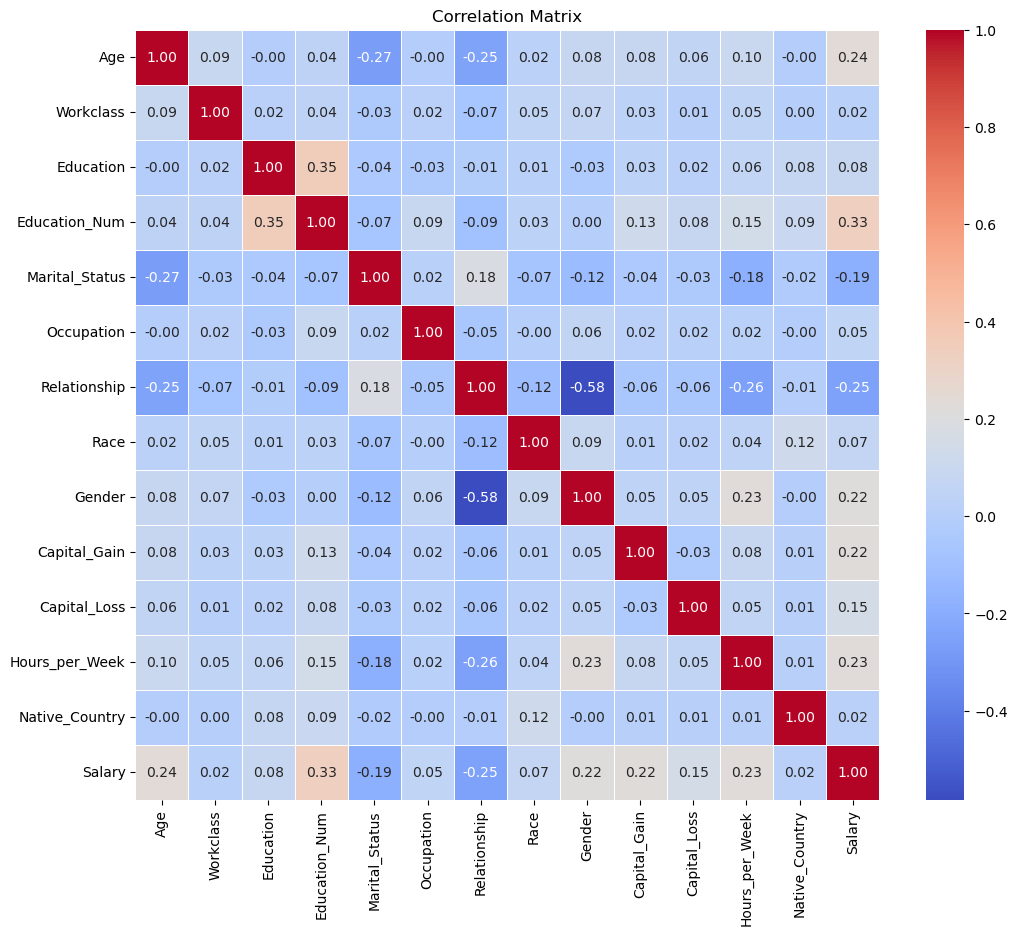

In [107]:
# Plot all categorical columns in one figure using subplots
categorical_columns = ["Workclass", "Education", "Marital_Status", "Occupation", 
                       "Relationship", "Race", "Gender", "Native_Country"]

fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns layout
axes = axes.flatten()  # Flatten to iterate easily

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, hue="Salary", order=data[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{column} vs. Salary")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



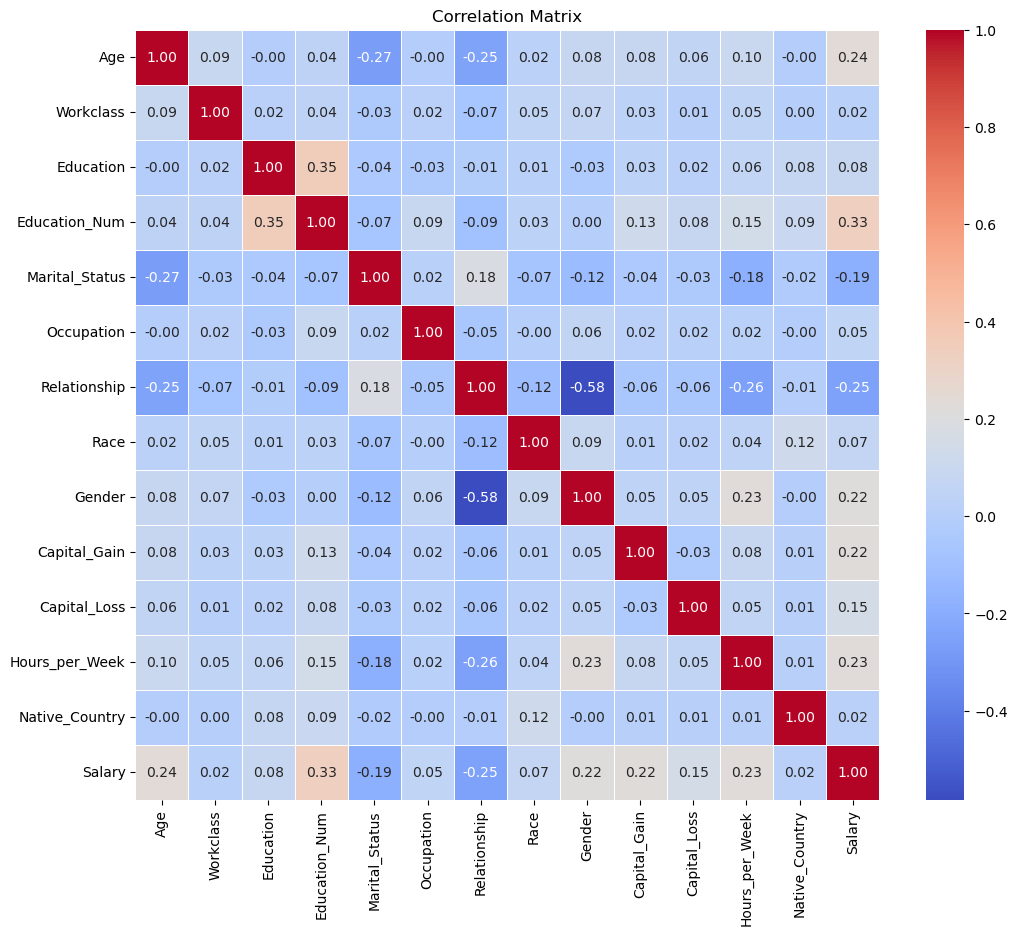

In [109]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [77]:
#Step 3: Encode the categorical variables
# Define an empty dictionary to store the encoders
label_encoders = {}

# Encode categorical columns
categorical_columns = [
    "Workclass", "Education", "Marital_Status", "Occupation", 
    "Relationship", "Race", "Gender", "Native_Country", "Salary"
]

for column in categorical_columns:
    label_encoder = LabelEncoder()  # Create a LabelEncoder instance
    data[column] = label_encoder.fit_transform(data[column])  # Transform the column
    label_encoders[column] = label_encoder  # Store the encoder in the dictionary

In [81]:
#Step 4: Normalize the numeric features
numerical_columns = [
    "Age", "Education_Num", "Capital_Gain", "Capital_Loss", "Hours_per_Week"
]
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [86]:
#Step 5: Split the data into training and testing
X = data.drop("Salary", axis = 1)
y = data["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

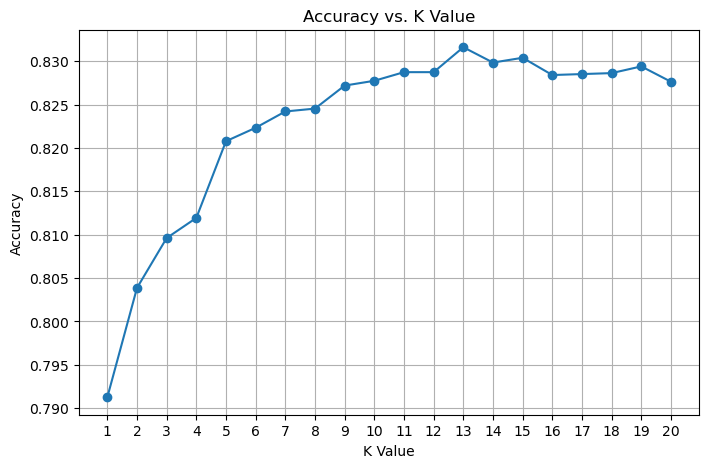

In [95]:
#Step 6: Find the optimal value of k
accuracies = []
k_values = range(1,21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k) #Creates a KNN model with the current K
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Visualize accuracy vs. k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()

In [99]:
#Step 7: Train the final model with the best k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors = best_k) #creating a KNN model using the best k
knn_best.fit(X_train, y_train)
y_pred_best = knn.predict(X_test) #using the testing models to predict the labels


Best k: 13


In [101]:
#Step 8: evaluating the model
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
classification_rep = classification_report(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f"Optimal k: {best_k}")
print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Optimal k: 13
Model Accuracy: 0.8276395798783859
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6757
           1       0.72      0.52      0.60      2288

    accuracy                           0.83      9045
   macro avg       0.79      0.72      0.75      9045
weighted avg       0.82      0.83      0.82      9045



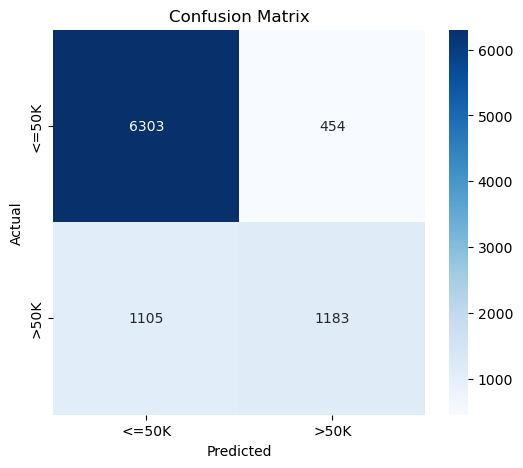

In [103]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()